In [1]:
import json
from misc import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

In [2]:
from autoPyTorch import AutoNetRegression

/home/bakirillov/anaconda3/envs/lapki/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
from sklearn.model_selection import train_test_split

# English

In [4]:
data = pd.read_csv("english_1hot.csv")
X = data.values[:,1:-1].astype(np.float32)
Y = data.values[:,-1:].reshape(-1,).astype(np.float32)
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.2)    

In [5]:
auto = AutoNetRegression(
    "tiny_cs",
    log_level='info',
    max_runtime=300,
    min_budget=30,
    max_budget=90
)

/home/bakirillov/.local/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [6]:
auto.fit(train_X, train_Y, validation_split=0.1)

14:37:59 [AutoNet] Start bohb
14:37:59 DISPATCHER: started the 'discover_worker' thread
14:37:59 WORKER: start listening for jobs
14:37:59 DISPATCHER: started the 'job_runner' thread
14:37:59 DISPATCHER: Pyro daemon running on 192.168.1.222:42459
14:37:59 DISPATCHER: discovered new worker, hpbandster.run_0.worker.bakirillov-Alienware-17-R5.19110.-1140253795501888
14:37:59 HBMASTER: adjusted queue size to (0, 1)
14:37:59 DISPATCHER: A new worker triggered discover_worker
14:37:59 HBMASTER: starting run at 1585222679.2928395
14:37:59 WORKER: start processing job (0, 0, 0)
14:37:59 Fit optimization pipeline
14:37:59 [AutoNet] No validation set given and either no cross validator given or budget too low for CV. Continue by splitting 0.1 of training data.
14:37:59 [AutoNet] CV split 0 of 1
14:37:59 Reduced initial budget 29.913280248641968 to cv budget 29.91250777244568 compensate for 0.0007724761962890625
14:38:19 Finished train with budget 29.91250777244568: Preprocessing took 2s, Trainin

{'optimized_hyperparameter_config': {'CreateDataLoader:batch_size': 125,
  'Imputation:strategy': 'median',
  'InitializationSelector:initialization_method': 'default',
  'InitializationSelector:initializer:initialize_bias': 'No',
  'LearningrateSchedulerSelector:lr_scheduler': 'cosine_annealing',
  'LossModuleSelector:loss_module': 'l1_loss',
  'NetworkSelector:network': 'shapedresnet',
  'NormalizationStrategySelector:normalization_strategy': 'standardize',
  'OptimizerSelector:optimizer': 'sgd',
  'PreprocessorSelector:preprocessor': 'truncated_svd',
  'ResamplingStrategySelector:over_sampling_method': 'none',
  'ResamplingStrategySelector:target_size_strategy': 'none',
  'ResamplingStrategySelector:under_sampling_method': 'none',
  'TrainNode:batch_loss_computation_technique': 'standard',
  'LearningrateSchedulerSelector:cosine_annealing:T_max': 10,
  'LearningrateSchedulerSelector:cosine_annealing:T_mult': 2,
  'NetworkSelector:shapedresnet:activation': 'relu',
  'NetworkSelector:

In [8]:
train_Yhat = auto.predict(train_X)

In [10]:
test_Yhat = auto.predict(test_X)

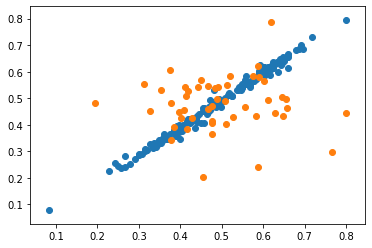

In [13]:
plt.scatter(train_Y, train_Yhat)
plt.scatter(test_Y, test_Yhat)

In [14]:
spearmanr(train_Y, train_Yhat), spearmanr(test_Y, test_Yhat)

(SpearmanrResult(correlation=0.9926749881998753, pvalue=2.3356463300629205e-176),
 SpearmanrResult(correlation=0.03790913034729322, pvalue=0.7959389521535585))